In [124]:
#coding:utf-8
'''
均值滤波
https://blog.csdn.net/firemicrocosm/article/details/48622961
'''
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [125]:
src = cv2.cvtColor(cv2.imread('datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [126]:
#添加图像噪声
def salt(src,num):
    if type(src) == type(None):
        return None
    dst = src.copy()
    if len(src.shape) == 3 and src.shape[2] == 3:
        rows,cols,_ = src.shape
        for n in range(num):
            y = np.random.randint(rows - 1)
            x = np.random.randint(cols - 1)
            dst[y,x] = (255,255,255)
    elif len(src.shape) == 2:
        rows,cols = src.shape
        for n in range(num):
            y = np.random.randint(rows - 1)
            x = np.random.randint(cols - 1)
            dst[y,x] = 255
    else:
        return None
    
    return dst
        

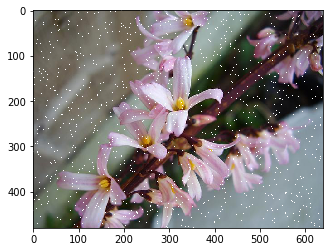

In [127]:
dst = salt(src,5000)
plt.imshow(dst)

In [128]:
def avg_gray_filter(img):
#     if type(src) == type(None) or len(src.shape) > 2:
#         return None
    src = np.float32(img)
    rows = src.shape[0]
    cols = src.shape[1]
    dst = np.zeros(src.shape,dtype=np.float64)
    for i in range(1,rows - 1):
        for j in range(1,cols - 1):
            pixel_r = np.float64(src[i, j,0] / 255.0 + src[i - 1, j - 1,0] / 255.0 + src[i - 1, j,0] / 255.0 + \
                    src[i, j - 1,0] / 255.0 +  src[i - 1, j + 1,0] / 255.0 + src[i + 1, j - 1,0] / 255.0 + \
                    src[i + 1, j + 1,0] / 255.0 + src[i, j + 1,0] / 255.0 +  src[i + 1, j,0] / 255.0)
            pixel_r = pixel_r *255 / 9.0
            
            if pixel_r > 255:
                pixel_r = 255
                
            dst[i,j,0] = pixel_r
            
            pixel_g = np.float64(src[i, j,1] / 255.0+ src[i - 1, j - 1,1]/ 255.0 + src[i - 1, j,1]/ 255.0 + \
                    src[i, j - 1,1]/ 255.0 +  src[i - 1, j + 1,1]/ 255.0 + src[i + 1, j - 1,1] / 255.0+ \
                    src[i + 1, j + 1,1]/ 255.0 + src[i, j + 1,1]/ 255.0 +  src[i + 1, j,1]/ 255.0)
            pixel_g = pixel_g * 255 / 9.0
            
            if pixel_g > 255:
                pixel_g = 255
                
            dst[i,j,1] = pixel_g
            
            pixel_b = np.float64(src[i, j,2]/ 255.0 + src[i - 1, j - 1,2]/ 255.0 + src[i - 1, j,2] / 255.0+ \
                    src[i, j - 1,2]/ 255.0 +  src[i - 1, j + 1,2]/ 255.0 + src[i + 1, j - 1,2] / 255.0+ \
                    src[i + 1, j + 1,2] / 255.0+ src[i, j + 1,2] / 255.0+  src[i + 1, j,2]/ 255.0)
            pixel_b = pixel_b * 255/ 9.0
            
            if pixel_b > 255:
                pixel_b = 255
                
            dst[i,j,2] = pixel_b
    
    return cv2.convertScaleAbs(dst)
    

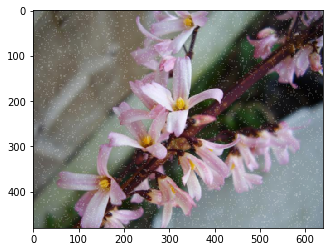

In [129]:
noise = salt(src,5000)
# channels = cv2.split(noise)
dst = avg_gray_filter(noise)
plt.imshow(dst)

In [144]:
'''
获取数组的中值
'''
def get_median(kernel):
    dst = sorted(kernel)
    if len(dst) % 2 == 0:
        return (dst[len(dst) // 2 - 1] + dst[len(dst) // 2]) / 2
    else:
        return dst[len(dst) // 2]
'''
中值滤波
'''
def median_blur(img):
    rows = img.shape[0]
    cols = img.shape[1]
    src = np.float32(img)
    dst = np.zeros_like(src)
    for i in range(1,rows - 1):
        for j in range(1,cols - 1):
            kernel_r = [src[i, j,0] / 255.0 , src[i - 1, j - 1,0] / 255.0 , src[i - 1, j,0] / 255.0 ,
                        src[i, j - 1,0] / 255.0 ,  src[i - 1, j + 1,0] / 255.0 , src[i + 1, j - 1,0] / 255.0 ,
                        src[i + 1, j + 1,0] / 255.0 , src[i, j + 1,0] / 255.0 ,  src[i + 1, j,0] / 255.0]
            median_r = get_median(kernel_r) * 255
    
            if median_r > 255:
                median_r = 255
                
            kernel_g = [src[i, j,1] / 255.0, src[i - 1, j - 1,1]/ 255.0 , src[i - 1, j,1]/ 255.0 ,
                        src[i, j - 1,1]/ 255.0 ,  src[i - 1, j + 1,1]/ 255.0 , src[i + 1, j - 1,1] / 255.0,
                        src[i + 1, j + 1,1]/ 255.0, src[i, j + 1,1]/ 255.0 ,  src[i + 1, j,1]/ 255.0]
            median_g = get_median(kernel_g) * 255
    
            if median_g > 255:
                median_g = 255
                
            kernel_b = [src[i, j,2]/ 255.0 , src[i - 1, j - 1,2]/ 255.0 , src[i - 1, j,2] / 255.0,
                    src[i, j - 1,2]/ 255.0 ,  src[i - 1, j + 1,2]/ 255.0 , src[i + 1, j - 1,2] / 255.0,
                    src[i + 1, j + 1,2] / 255.0, src[i, j + 1,2] / 255.0,  src[i + 1, j,2]/ 255.0]
            median_b = get_median(kernel_b) * 255
    
            if median_b > 255:
                median_b = 255
                
            dst[i,j,0] = median_r
            dst[i,j,1] = median_g
            dst[i,j,2] = median_b
    
    return cv2.convertScaleAbs(dst)
    
    

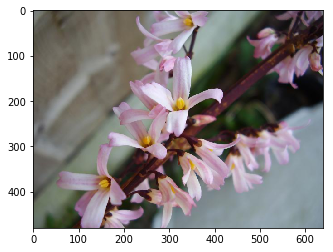

In [145]:
dst = median_blur(noise)
plt.imshow(dst)

In [155]:
# 自适应均值滤波
# 参考：https://www.cnblogs.com/wangguchangqing/p/6379646.html
def adaptive_median_processing(src,row,col,ksize,max_size):

    pixels = []
    for a in range(-ksize // 2,ksize // 2):
        for b in range(-ksize //2,ksize // 2):
            pixels.append(src[row + a,col + b])
            
    pixels_sorted = sorted(pixels)
    min_val = pixels_sorted[0]
    med_val = pixels_sorted[(ksize * ksize) // 2 ]
    max_val = pixels_sorted[ksize * ksize - 1]
    zxy = src[row,col]
    if med_val > min_val and med_val < max_val:
        if zxy > min_val and zxy < max_val:
            return zxy
        else:
            return med_val
    else:
        # 增加窗口尺寸，继续查找
        ksize += 2
        if ksize <= max_size:
            return adaptive_median_processing(src,row,col,ksize,max_size)
        else:
            return med_val
    
def adative_median_blur(img,ksize,max_size,min_size):
    src = np.float32(img) / 255.0
    dst = cv2.copyMakeBorder(src,max_size // 2,max_size // 2,max_size // 2,max_size // 2,cv2.BORDER_REPLICATE)
    rows = src.shape[0]
    cols = src.shape[1]
    for j in range(max_size // 2,rows - max_size // 2):
        for i in range(max_size // 2,cols - max_size // 2):
            dst[j,i] = adaptive_median_processing(dst,j,i,min_size,max_size)
    
    return dst

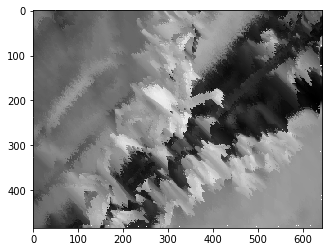

In [157]:
gray = cv2.cvtColor(noise,cv2.COLOR_RGB2GRAY)
dst = adative_median_blur(gray,ksize=3,max_size=5,min_size=3)
plt.imshow(dst,cmap = 'gray')

In [174]:
def get_median_value(target_array,array_length):
    sorted_array = np.sort(target_array)
    median = sorted_array[array_length // 2]
    return median

def adaptive_filter(image,size,window,threshold):
    W = 2 * window + 1
    xlength,ylength = size
    vlength = W * W
    
    image_array = np.reshape(np.array(image,dtype=np.uint8),(ylength,xlength))
    filter_window = np.array(np.zeros((W,W)))
    target_vector = np.array(np.zeros(vlength))
    
    pixel_count = 0
    
    try:
        
        for y in range(window,ylength - (window + 1)):
            for x in range(window,xlength - (window + 1)):
                filter_window = image_array[y - window:y+window+1,
                                           x - window:x+window+1]
                target_vector = np.reshape(filter_window,((vlength),))
                median = get_median_value(target_vector,vlength)
                
                if not threshold > 0:
                    image_array[y,x] = median
                    pixel_count += 1
                else:
                    scale = np.zeros(vlength)
                    for n in range(vlength):
                        scale[n] = np.abs(int(target_vector[n] - int(median)))
                    scale = np.sort(scale)
                    SK = 1.4826 * (scale[vlength // 2])
                    if np.abs(int(image_array[y,x]) - int(median)) > (threshold * SK):
                        image_array[y,x] = median
                        pixel_count += 1
                
    except TypeError:
        print('Error in processing function:',err)
    
    return np.reshape(image_array,(ylength,xlength))

In [184]:
window = 1
threshold = 0
channels = cv2.split(noise)
results = []
for i in range(len(channels)):
    noise_gray = channels[i]
    dst = adaptive_filter(noise_gray,(noise_gray.shape[1],noise_gray.shape[0]),window,threshold)
    results.append(dst)
    
dst = cv2.merge(results)
# noise_gray = cv2.cvtColor(noise,cv2.COLOR_RGB2GRAY)
# dst = adaptive_filter(noise_gray,(noise_gray.shape[1],noise_gray.shape[0]),window,threshold)
# print(dst.shape)
# plt.imshow(noise_gray,cmap='gray')

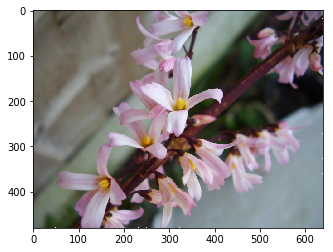

In [185]:
plt.imshow(dst)